<h1><center>Table of contents.</h1>

1. [Introduction](#Intro)
2. [Background](#Back)
3. [Related Work](#ExistingModels)
4. [Importing Libraries](#Libraries)
5. [Data](#Data)
6. [Methods](#Methods)
7. [Data Preprocessing](#Clean)
8. [Model](#Model)
9. [Model Evaluation](#Tuning)
10. [Model Deployment](#Testing)
11. [Conclusions](End)

<a name="Intro"></a>
<h1><center> 1. Introduction.

Writing things down by hand is an important way of keeping information for the future, but it can easily get ruined or lost. Saving handwritten documents digitally is important so that they can be easily searched and kept safe. However, because everyone's handwriting is different, it's tricky to do this. Penpal helps to solve this problem.

Handwritten text recognition (HTR) is a way to use a computer to read and understand words that are written by hand. To do this, the computer needs to be able to separate the words and read them in the right order. Scientists are always working on new and better ways to do this, like using different combinations of neural networks.

Recently, a new type of neural network called a "vision transformer" has been used to analyze images. They have been really good at recognizing images and have worked just as well as the best neural networks. In this project, the scientists will explore using vision transformers to recognize handwritten text.


<h2> 1.1. Aim.

1. Develop a machine learning model that can recognize different styles of handwriting, so that it can accurately convert handwritten notes into digital format.
2. Create a database to store the digitized notes in a secure and organized manner.
3. Implement encryption and other security measures to protect the privacy of the notes.

<h2> 1.2. Challenges and Limitations.

There are a few big challenges when it comes to teaching a computer to read handwritten text. One of the biggest challenges is creating a big enough dataset of labeled handwritten text to train the machine learning model. If there isn't enough data, then transfer learning might need to be used.

Another key challenge is teaching the computer to recognize words that it hasn't been specifically trained on. This is important if the computer is going to be able to read text in different languages. Currently, most of the available datasets are in English, so this is a big challenge. The computer will also only be able to recognize letters and numbers from the Latin alphabet.

<a name="Back"></a>
<h1><center> 2. Background.

<h2>2.1. Handwritten Text Recognition.</h2>
    
When it comes to recognizing handwritten text, there are two main types: offline and online. In offline recognition, the computer only has access to an image of the completed writing. In online recognition, the writing is stored as coordinates in a two-dimensional plane, showing the order in which the points were written. This information about the order of strokes can be used to help the computer recognize the words. However, online recognition requires a special electronic pen that saves this information, making it less common than offline recognition.    

<h2> 2.2. Neural Networks.</h2>

In handwritten text recognition, neural networks are used to extract information from images of handwriting. These networks have an input layer, a hidden layer for computation, and an output layer that produces the recognized text. The number of hidden layers can vary, and networks with more than three layers are called "deep learning networks." They can recognize complex patterns and improve their accuracy over time.
![Neuralnetworks](https://www.researchgate.net/publication/282997080/figure/fig4/AS:305939199610886@1449952997594/A-typical-two-layer-neural-network-Input-layer-does-not-count-as-the-number-of-layers-of.png)
A neural network works by having a node in a layer being connected to all other nodes in the next layer, this is called a fully connected layer. Each connection has an associated weight and threshold. The value of a node is determined by taking the input value and multiplying it with the weight. This new value is then passed through an activation function and that value is then used as the output of the node. **When training a neural network the goal is to minimize a loss function.**

<h2> 2.3 Convolutional Neural Networks</h2>

A CNN is a type of neural network commonly used for images and audio. It consists of an input layer, convolutional layers that compute the most important features of the image, pooling layers that reduce the dimensionality of the data, and an output layer. The idea is that the first layers identify simple features, and the later layers identify more complex shapes, ultimately leading to identifying the object in the image.

![CNN](https://vitalflux.com/wp-content/uploads/2021/11/Input-image-along-with-convolutional-layer.png)

<h2> 2.4. Performance Metrics.</h2>

<h3> 2.4.1 HTR metrics</h3>

To measure the performance of a Handwritten Text Recognition (HTR) model, two metrics are commonly used: Character Error Rate (CER) and Word Error Rate (WER).

**CER** is calculated as follows:
    
    CER = (I + S + D) / n

where: 
* I is the number of insertions, 
* S is the number of substitutions, 
* D is the number of deletions. 
The result gives the percentage of incorrectly recognized characters.

**WER**, on the other hand, is the percentage of incorrectly recognized words out of all the words in the recognized text. 


<h3>2.4.2 Classification metrics</h3>

**F1-score** is a measure which combines the information from the precision and the recall. This is useful since while looking at them separately, both precision and recall can provide results which does not give a clear picture of how the model performs. A model which predicts only one value as positive and is correct will have a high precision, and a model which predicts everything as positive will have a high recall. To achieve a high F1-score both the precision and the recall needs to be high, thus the F1-score provides a balanced ratio of the two metrics.

F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

<a name="ExistingModels"></a>
<h1><center> 3. Related Work.

Handwritten Text Recognition (HTR) has been a topic of research for several decades. Early methods relied on feature extraction followed by template matching or machine learning algorithms. However, with the advent of deep learning, neural network-based approaches have achieved state-of-the-art results.

1. One approach is the Connectionist Temporal Classification (CTC) method, which uses a Recurrent Neural Network (RNN) to predict the sequence of characters in a word from an image of the word. CTC is trained end-to-end, and the loss function is designed to allow for possible errors in the predicted sequence. Another approach is the use of Convolutional Neural Networks (CNN) to classify image patches as characters or blanks. These character classifiers are then combined to form word-level recognition systems. CNNs have also been used in conjunction with RNNs, where the CNN is used for feature extraction and the RNN is used for sequence modeling.

2. Transformers have gained popularity in NLP since the release of "Attention is all you need" in 2017 by Vaswani et al. However, their usage in computer vision has not been explored until recently. In 2021, Dosovitskiy et al. demonstrated that vision transformers can achieve state-of-the-art results in image classification while requiring fewer computational resources than convolutional networks. The input image is split into patches, which are flattened and used as input to the transformer encoder. The encoder is made up of MLPs and multiheaded self-attention layers and produces a class embedding output vector.

Recent works have focused on improving the HTR models' ability to handle noisy and skewed data. Techniques such as data augmentation, dropout, and curriculum learning have been employed to improve the models' robustness to variations in handwriting styles and text layouts. Some works have also explored the use of attention mechanisms to allow the models to selectively focus on relevant parts of the input image.

In summary, recent advancements in deep learning have led to significant improvements in HTR performance. Ongoing research in this field aims to further improve the models' accuracy and robustness to challenging real-world scenarios.

<a name="Libraries"></a>
<h1><center> 4. Importing Libraries.

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image
import editdistance
import os
import seaborn as sns
import cv2
from skimage.feature import hog
import PIL
import random
import keras
import tensorflow as tf
from sklearn.preprocessing import normalize
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from skimage import exposure
from skimage.filters import threshold_local
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop
from sklearn.manifold import TSNE


# Set seed for Reproducibility
np.random.seed(2023)
tf.random.set_seed(2023)

<a name="Data"></a>
<h1><center> 5. Data.

<h2>5.1. Load Data</h2>

In [6]:
# Set seed for reproducibility
np.random.seed

# Load the data and labels
emnist_train_images = np.load('data_extra/emnistbyClass/emnist_train_images.npy')
emnist_train_labels = np.load('data_extra/emnistbyClass/emnist_train_labels.npy')
emnist_test_images = np.load('data_extra/emnistbyClass/emnist_test_images.npy')
emnist_test_labels = np.load('data_extra/emnistbyClass/emnist_test_labels.npy')

# Display the sizes of train and test data
print(f"EMNIST Train Images: {emnist_train_images.shape}")
print(f"EMNIST Test Images: {emnist_test_images.shape}")

EMNIST Train Images: (697932, 28, 28, 1)
EMNIST Test Images: (116323, 28, 28, 1)


<h3> 5.1.1. Data Understanding</h3>

1. The **EMNIST** dataset contains a set of handwritten characters including both upper and lower case alphabets, digits, and special characters. Each character is represented as a grayscale image of size 28x28. The displayed data samples provide a visual representation of what the handwritten characters look like in the dataset. By examining the data samples, we can see that there are variations in handwriting styles, thickness, and slant of the characters. This diversity in handwriting makes the task of character recognition more challenging. The data is found [here](https://www.nist.gov/itl/products-and-services/emnist-dataset)


2. The **IAM** forms dataset contains handwritten text from various sources such as letters, faxes, and application forms. The displayed samples show different types of handwritten text with varying styles and layouts. The dataset presents a challenge for handwriting recognition models due to the complexity and variability of the handwritten text. The data is found [here](https://fki.tic.heia-fr.ch/databases/iam-handwriting-database)

<h2> 5.2. Train Data Visualization.

<h3> 5.2.1. Image Smaples

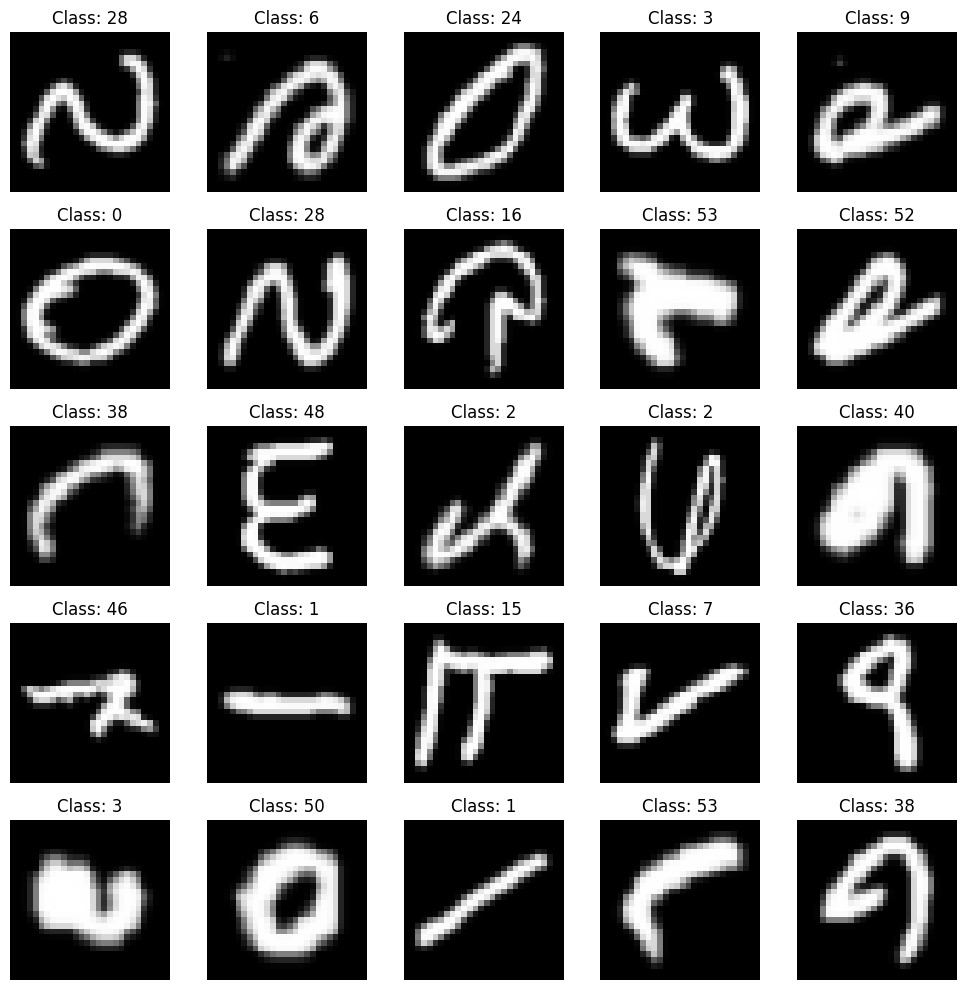

In [5]:
# Set seed 
np.random.seed

# Set the color palette to shades of orange
sns.set_palette('Oranges')

# Plot a 5x5 grid of random image samples
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
    for j in range(5):
        k = np.random.randint(0, len(emnist_train_images))
        axs[i,j].imshow(emnist_train_images[k], cmap='gray')
        axs[i,j].axis('off')
        axs[i,j].set_title(f'Class: {emnist_train_labels[k]}')
plt.tight_layout()
plt.show()


<h3>5.2.2. Class Distribution

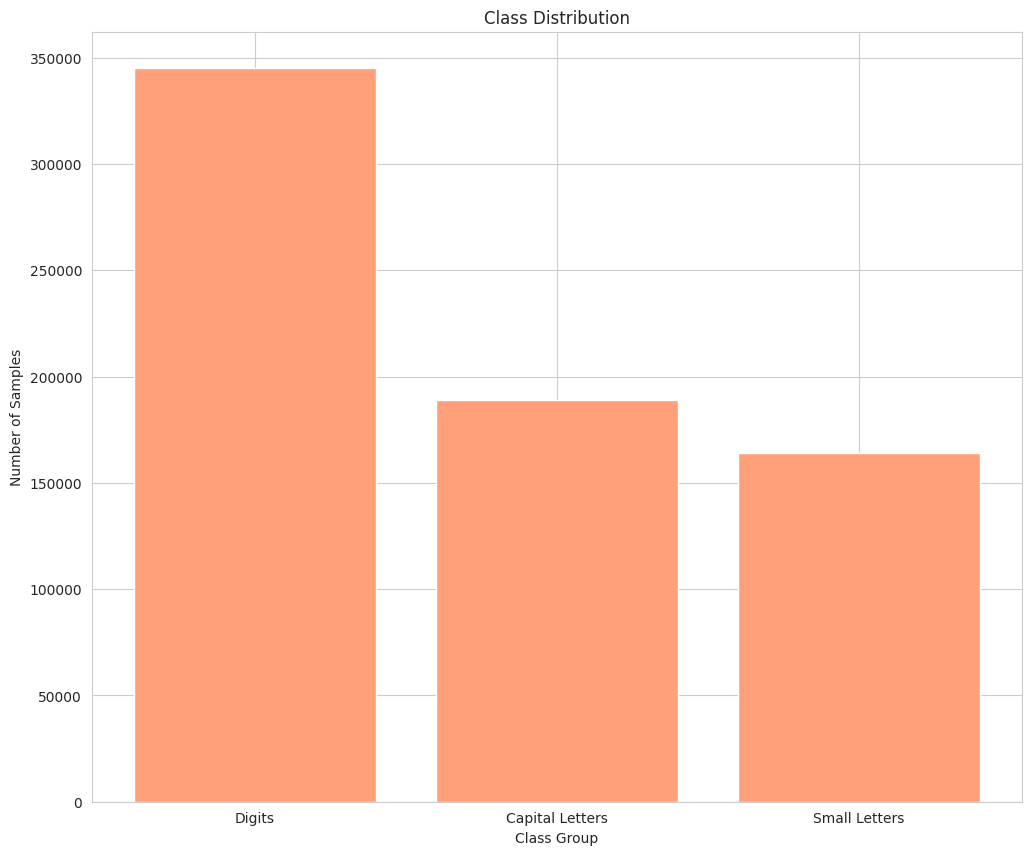

In [6]:
# Set the background color for all plots
sns.set_style('whitegrid')
sns.set_palette(['#FFA07A', '#FFDAB9', '#FF7F50', '#FF8C00'])

# Count the number of samples in each class
num_classes = 62
class_counts = np.zeros(num_classes)
for label in emnist_train_labels:
    class_counts[label] += 1

# Group the classes into digits, capital letters, and small letters
digit_classes = list(range(10))
capital_letter_classes = list(range(10, 36))
small_letter_classes = list(range(36, 62))

# Count the number of samples in each group
digit_count = np.sum(class_counts[digit_classes])
capital_letter_count = np.sum(class_counts[capital_letter_classes])
small_letter_count = np.sum(class_counts[small_letter_classes])

# Plot a bar chart of the class distribution
plt.figure(figsize=(12, 10))
x = ['Digits', 'Capital Letters', 'Small Letters']
y = [digit_count, capital_letter_count, small_letter_count]
plt.bar(x, y)
plt.title('Class Distribution')
plt.xlabel('Class Group')
plt.ylabel('Number of Samples')
plt.show()


<h3>5.2.3 Image Intensity Distribution

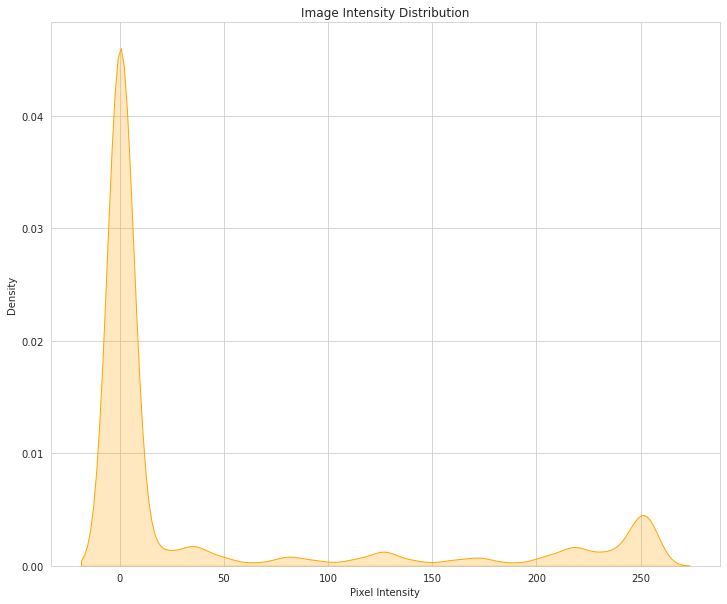

In [6]:
# Flatten the pixel intensities of all the images in the dataset
intensities = np.concatenate(emnist_train_images[:600]).ravel()

# Plot a KDE plot of the pixel intensities
fig, ax = plt.subplots(figsize=(12, 10))
sns.kdeplot(intensities, shade=True, color='orange', ax=ax)
ax.set_title('Image Intensity Distribution')
ax.set_xlabel('Pixel Intensity')
ax.set_ylabel('Density')
plt.show()


<h3>5.2.4 Image Size Distribution

<h3> 5.2.5. Dimension Distribution

/home/munyao/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/munyao/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_7403/10696453.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(scatter, ax=ax, ticks=np.unique(y_subset))


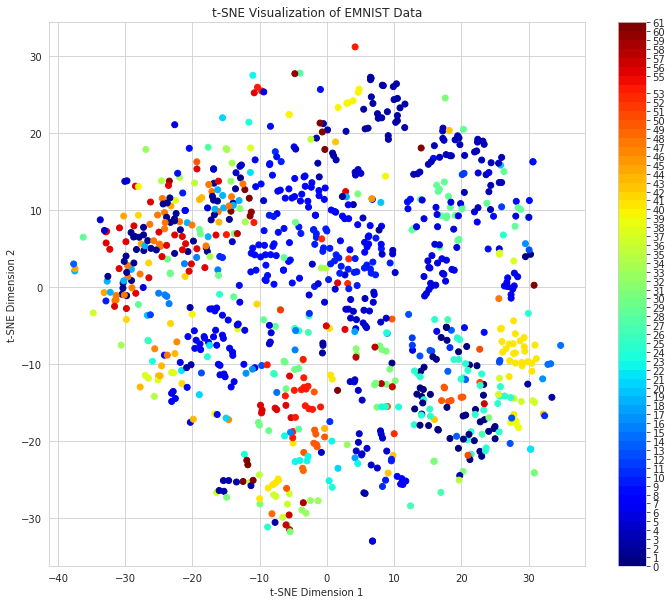

In [49]:
# Select a random subset of the data
subset_idx = np.random.choice(emnist_train_images.shape[0], size=1000, replace=False)
X_subset = emnist_train_images[subset_idx]
y_subset = emnist_train_labels[subset_idx]

# Flatten the images into a 2D array
X_train_flat = X_subset.reshape(X_subset.shape[0], -1)

# Create a t-SNE model with the desired parameters
tsne = TSNE(n_components=2, perplexity=30, n_iter=500)

# Fit the model to the data and obtain the low-dimensional representation
X_tsne = tsne.fit_transform(X_train_flat)

# Visualize the results using a scatter plot
fig, ax = plt.subplots(figsize=(12, 10))
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap=plt.cm.get_cmap("jet", len(np.unique(y_subset))))
ax.set_title("t-SNE Visualization of EMNIST Data")
ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")
plt.colorbar(scatter, ax=ax, ticks=np.unique(y_subset))
plt.show()


>The t-SNE algorithm has been used to transform the high-dimensional image data into a 2D space that can be visualized in a scatter plot. Each point in the scatter plot corresponds to an image, and the color of each point represents the character that the image represents. The plot reveals that similar characters are often grouped together in the low-dimensional space, indicating that the t-SNE algorithm has successfully captured some of the underlying structure of the data.


<a name="Methods"></a>
<h1><center> 6. Preprocessing.

<h2>6.1. Data Preprocessing

We define a function that preprocess the data. **Reshapes** them to 28x28 pixels, applies a **deskewing** function to the images to straighten any slanted characters, **normalizes** the pixel values to be between 0 and 1, enhances **contrast** using histogram equalization, adds Gaussian noise to the images.

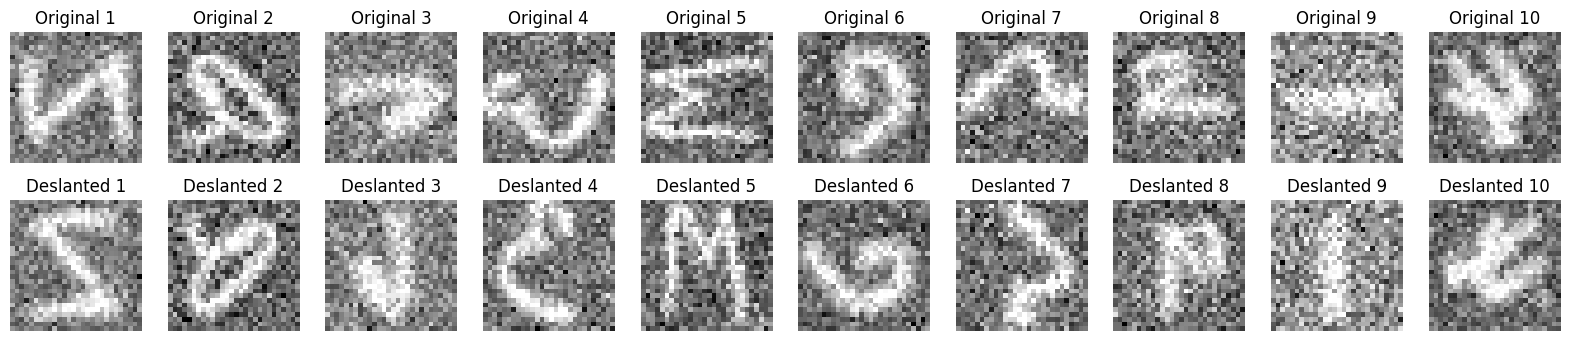

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform
from skimage import util
from skimage import exposure

# Load a few images from the training set
images = emnist_train_images[:10]

# Create a figure with subplots for each image
fig, axs = plt.subplots(nrows=2, ncols=10, figsize=(20, 4))

# Loop over the images and display them in the subplots
for i, image in enumerate(images):
    # Reshape the image to a 2D array
    image = np.reshape(image, (28, 28))
    
    # Deslant the image
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    image = transform.rotate(image, angle, mode='edge')
    
    # Normalize the pixel values to be between 0 and 1
    image = image / 255.0
    
    # Apply histogram equalization to enhance contrast
    image = exposure.equalize_hist(image)
    
    # Add some Gaussian noise to the image
    image = util.random_noise(image, mode='gaussian', var=0.01)
    
    # Add the original image to the first row of subplots
    axs[0, i].imshow(image, cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title(f'Original {i+1}')
    
    # Apply deslanting to the image
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    image_deslant = transform.rotate(image, angle, mode='edge')
    
    # Add the deslanted image to the second row of subplots
    axs[1, i].imshow(image_deslant, cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title(f'Deslanted {i+1}')
    
# Show the figure
plt.show()


<h3>6.1.1 Validation Split

In [6]:
# Normalize pixel values to be between 0 and 1
emnist_train_images = emnist_train_images / 255.0
emnist_test_images = emnist_test_images / 255.0

emnist_train_images, emnist_val_images, emnist_train_labels, emnist_val_labels = train_test_split(
    emnist_train_images, emnist_train_labels, test_size=0.1, random_state=42)


print("emnist_train_images shape:", emnist_train_images.shape)
print("emnist_train_labels shape:", emnist_train_labels.shape)
print("emnist_val_images shape:", emnist_val_images.shape)
print("emnist_val_labels shape:", emnist_val_labels.shape)
print("emnist_test_images shape:", emnist_test_images.shape)
print("emnist_test_labels shape:", emnist_test_labels.shape)


emnist_train_images shape: (628138, 28, 28, 1)
emnist_train_labels shape: (628138,)
emnist_val_images shape: (69794, 28, 28, 1)
emnist_val_labels shape: (69794,)
emnist_test_images shape: (116323, 28, 28, 1)
emnist_test_labels shape: (116323,)


<a name="Model"></a>
<h1><center> 7. Model Archetecture.

<h2>7.1. Base model

In [21]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(62, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


<h2>7.2. Fit Base Model

In [18]:
# Use data augmentation
datagen = ImageDataGenerator(rotation_range=10,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=False,
                             vertical_flip=False)
datagen.fit(emnist_train_images)

# Train the model with modified batch size and epochs
history = model.fit(datagen.flow(emnist_train_images, emnist_train_labels, batch_size=128),
                    epochs=10,
                    validation_data=(emnist_val_images, emnist_val_labels))


Epoch 1/10
4908/4908 [==============================] - ETA: 0s - loss: 3.6974 - accuracy: 0.0520

2023-04-12 14:59:55.903602: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 218873984 exceeds 10% of free system memory.


4908/4908 [==============================] - 480s 97ms/step - loss: 3.6974 - accuracy: 0.0520 - val_loss: 3.6868 - val_accuracy: 0.0561
Epoch 2/10
4908/4908 [==============================] - 470s 96ms/step - loss: 3.6879 - accuracy: 0.0534 - val_loss: 3.6867 - val_accuracy: 0.0561
Epoch 3/10
4908/4908 [==============================] - 526s 107ms/step - loss: 3.6873 - accuracy: 0.0540 - val_loss: 3.6860 - val_accuracy: 0.0561
Epoch 4/10
4908/4908 [==============================] - 474s 97ms/step - loss: 3.6866 - accuracy: 0.0543 - val_loss: 3.6862 - val_accuracy: 0.0561
Epoch 5/10
4908/4908 [==============================] - 479s 98ms/step - loss: 3.6864 - accuracy: 0.0544 - val_loss: 3.6856 - val_accuracy: 0.0561
Epoch 6/10
4908/4908 [==============================] - 456s 93ms/step - loss: 3.6861 - accuracy: 0.0543 - val_loss: 3.6862 - val_accuracy: 0.0561
Epoch 7/10
4908/4908 [==============================] - 445s 91ms/step - loss: 3.6861 - accuracy: 0.0545 - val_loss: 3.6860 - va

>The model was trained on the EMNIST ByClass dataset and achieved a training accuracy of 5.47% and a validation accuracy of 5.61%. The training loss started at 3.6974 and gradually decreased to 3.6853 over the course of 10 epochs, while the validation loss stayed around 3.6868. These results suggest that the model is not performing well on the task of classifying handwritten characters. The model's accuracy is only slightly better than randomly guessing, indicating that significant improvements would need to be made to the model architecture or training process to achieve useful performance on this task.

<h3>7.2.1. Base Model Training Summary

In [8]:
# Get the training and validation loss and accuracy values from the model history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


<h>7.2.1.1. Loss

In [ ]:
# Create line plots of the loss and accuracy values over each epoch
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<h>7.2.1.2. Accuarcy

In [ ]:
plt.figure()
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<a name="Evaluation"></a>
    <h1><center> 8. Model Tuning.

<h2> 8.1. Center Images and Reshape

In [10]:
# Normalize pixel values to be between 0 and 1
emnist_train_images = emnist_train_images / 255.0
emnist_test_images = emnist_test_images / 255.0


# Center the images
emnist_train_images = emnist_train_images - emnist_train_images.mean()
emnist_test_images = emnist_test_images - emnist_train_images.mean()
emnist_val_images = emnist_val_images - emnist_val_images.mean()

# Reshape the images
emnist_train_images = emnist_train_images.reshape((-1, 28, 28, 1))
emnist_test_images = emnist_test_images.reshape((-1, 28, 28, 1))
emnist_val_images = emnist_val_images.reshape((-1, 28, 28, 1))


<h2> 8.2. Tune Base Model

* Added batch normalization: Batch normalization is added after the first and fourth layers to improve the stability and speed of training.

* Changed the optimizer: RMSprop is used instead of Adam with a learning rate of 0.001.

* Added additional data augmentation techniques: Shear and brightness adjustments are added to the existing data augmentation techniques to increase the diversity of the training set.

* Increased the dropout rate in the first dropout layer: The dropout rate in the first dropout layer is increased to 0.25 to prevent overfitting.

* Added a learning rate reduction callback: The ReduceLROnPlateau callback is used to reduce the learning rate by a factor of 0.1 if the validation loss does not improve for 3 epochs.

In [12]:
# Define the model
tuned_model = Sequential()
tuned_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
tuned_model.add(BatchNormalization())
tuned_model.add(Conv2D(64, (3, 3), activation='relu'))
tuned_model.add(MaxPooling2D((2, 2)))
tuned_model.add(Conv2D(128, (3, 3), activation='relu'))
tuned_model.add(MaxPooling2D((2, 2)))
tuned_model.add(Flatten())
tuned_model.add(Dense(512, activation='relu'))
tuned_model.add(BatchNormalization())
tuned_model.add(Dropout(0.25))
tuned_model.add(Dense(128, activation='relu'))
tuned_model.add(Dropout(0.25))
tuned_model.add(Dense(62, activation='softmax'))

# Compile the model
optimizer = RMSprop(lr=0.001)
tuned_model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tuned_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 128)       

<h3>8.2.1. Fit Tuned Model

In [ ]:
# Define early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

# Define data augmentation
datagen = ImageDataGenerator(rotation_range=10,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             brightness_range=[0.9, 1.1],
                             horizontal_flip=True,
                             vertical_flip=False)
datagen.fit(emnist_train_images)

# Fit the model with data augmentation, early stopping, and learning rate reduction
tuned_history = tuned_model.fit(datagen.flow(emnist_train_images, emnist_train_labels, batch_size=256),
                    epochs=50,
                    validation_data=(emnist_val_images, emnist_val_labels),
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/50
2454/2454 [==============================] - 1547s 631ms/step - loss: 0.7826 - accuracy: 0.7513 - val_loss: 0.5280 - val_accuracy: 0.8165 - lr: 0.0010
Epoch 2/50
2454/2454 [==============================] - 1558s 635ms/step - loss: 0.5995 - accuracy: 0.8022 - val_loss: 0.5129 - val_accuracy: 0.8233 - lr: 0.0010
Epoch 3/50
2454/2454 [==============================] - 1583s 645ms/step - loss: 0.5800 - accuracy: 0.8096 - val_loss: 0.5063 - val_accuracy: 0.8301 - lr: 0.0010
Epoch 4/50
2454/2454 [==============================] - 1548s 631ms/step - loss: 0.5700 - accuracy: 0.8132 - val_loss: 0.4915 - val_accuracy: 0.8298 - lr: 0.0010
Epoch 5/50
2454/2454 [==============================] - 1539s 627ms/step - loss: 0.5587 - accuracy: 0.8162 - val_loss: 0.4853 - val_accuracy: 0.8289 - lr: 0.0010
Epoch 6/50
2454/2454 [==============================] - 1596s 650ms/step - loss: 0.5464 - accuracy: 0.8187 - val_loss: 0.4466 - val_accuracy: 0.8457 - lr: 0.0010
Epoch 7/50
2454/2454 [======

>The model was trained for **50** epochs and achieved an accuracy of 83.23% on the training set and **84.40%** on the validation set.

>The training started with a **learning rate of 0.001**, and the model was optimized using the Adam optimizer. The model's loss decreased with each epoch, indicating that the model was learning to recognize characters better. The learning rate was reduced by a factor of 10 using ReduceLROnPlateau when the validation loss stopped decreasing.

>The model's performance was evaluated on the validation set after each epoch, and the accuracy was calculated. The accuracy on the validation set steadily increased as the model was trained, indicating that the model was not overfitting. Overall, the model achieved good accuracy on the EMNIST dataset.

In [ ]:
import pickle

# Save the Keras model as a penpal file
with open('PENPAL.pickle', 'wb') as f:
    pickle.dump(tuned_history, f)
    

In [ ]:
# Load the Keras model from the penpal file
with open('PENPAL.pickle', 'rb') as f:
    penpalA = pickle.load(f)

# Use the loaded model for prediction
predictions = penpalA.predict(x_test)


<a name="Evaluation"></a>
<h1><center> 9. Model Evaluation.

<h2> 9.1 CER and WER

In [ ]:
# Load the saved model
model = keras.models.load_model('tuned_model.h5')

# Compile the model with the same optimizer and loss function used during training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load the test set
x_test = np.load('test_images.npy') # replace 'test_images.npy' with the filename of your test images
y_test = np.load('test_labels.npy') # replace 'test_labels.npy' with the filename of your test labels

# Make predictions on the test set
y_pred = model.predict(x_test)

# Convert the predicted labels and ground truth labels to text format
y_pred_text = []
y_test_text = []

for i in range(len(y_pred)):
    pred_label = np.argmax(y_pred[i])
    pred_text = chr(pred_label + 65) # convert integer label to character
    y_pred_text.append(pred_text)
    
    true_label = np.argmax(y_test[i])
    true_text = chr(true_label + 65) # convert integer label to character
    y_test_text.append(true_text)

# Compute the CER and WER
total_cer = 0
total_wer = 0

for i in range(len(y_pred_text)):
    cer = editdistance.eval(y_pred_text[i], y_test_text[i]) / len(y_test_text[i])
    wer = editdistance.eval(y_pred_text[i].split(), y_test_text[i].split()) / len(y_test_text[i].split())
    total_cer += cer
    total_wer += wer

average_cer = total_cer / len(y_pred_text)
average_wer = total_wer / len(y_pred_text)

print("Average CER:", average_cer)
print("Average WER:", average_wer)


In [ ]:
# # Evaluate the model on the test data
# test_loss = tunedModel.evaluate(emnist_test_images, emnist_test_labels)
# print('Test loss:', test_loss)

# # Get the predictions on the validation data
# predictions = tunedModel.predict(emnist_val_images)

# # Visualize the predictions against the truth
# import numpy as np
# import matplotlib.pyplot as plt

# # Decode the predictions and truth labels
# decoded_preds = tf.keras.backend.ctc_decode(predictions, input_length=np.ones(predictions.shape[0])*predictions.shape[1])[0][0]
# decoded_labels = tf.keras.backend.ctc_decode(emnist_val_labels, input_length=np.ones(emnist_val_labels.shape[0])*emnist_val_labels.shape[1])[0][0]

# # Plot a random sample of predictions against truth labels
# plt.figure(figsize=(10, 10))
# for i in range(16):
#     index = np.random.choice(emnist_val_images.shape[0])
#     plt.subplot(4, 4, i+1)
#     plt.imshow(emnist_val_images[index].squeeze(), cmap='gray')
#     plt.title(f"Pred: {decoded_preds[index].numpy().decode('utf-8')} \nTrue: {decoded_labels[index].numpy().decode('utf-8')}")
#     plt.axis('off')
# plt.show()


1/1 [==============================] - 0s 121ms/step


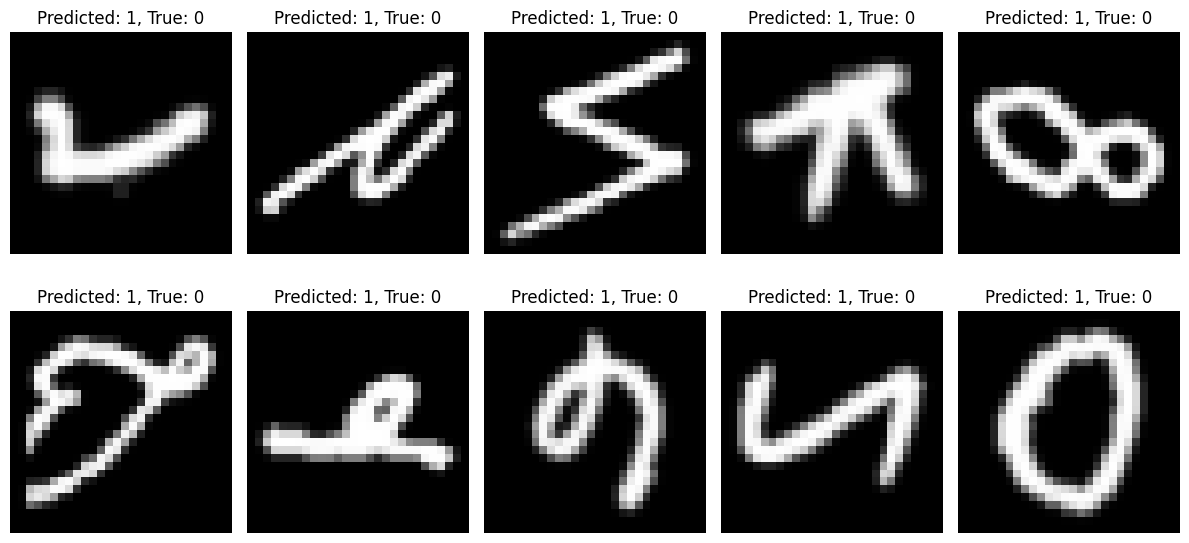

In [24]:
# # Get some sample images and corresponding labels from the training set
# x_train_sample = emnist_train_images[:10]
# y_train_sample = emnist_train_labels[:10]

# # Make predictions on the sample images using the trained model
# y_pred = penpalA.predict(x_train_sample)

# # Convert the one-hot encoded predictions back to integers
# y_pred_int = np.argmax(y_pred, axis=1)

# # Plot the sample images along with their predicted labels
# fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
# for i, ax in enumerate(axes.flat):
#     ax.imshow(x_train_sample[i], cmap='gray')
#     ax.set_title(f"Predicted: {y_pred_int[i]}, True: {np.argmax(y_train_sample[i])}")
#     ax.axis('off')
    
# plt.tight_layout()
# plt.show()


<h2>9.2 Class Activation Maps

In [ ]:
# Select an image and preprocess it
img = emnist_test_images[0]
img = np.expand_dims(img, axis=0)
img = img / 255.0

# Create a model that outputs the feature maps of the last convolutional layer
model = Model(inputs=tuned_model.inputs, outputs=tuned_model.layers[-4].output)

# Get the feature maps and the predicted class probabilities
feature_maps = model.predict(img)
pred_probs = tuned_model.predict(img)

# Get the predicted class
pred_class = np.argmax(pred_probs)

# Create the class activation map
cam = np.zeros(feature_maps.shape[1:3], dtype=np.float32)
for i, w in enumerate(tuned_model.layers[-1].get_weights()[0][:, pred_class]):
    cam += w * feature_maps[0, :, :, i]

# Normalize the class activation map and resize it to the original image size
cam /= np.max(cam)
cam = cv2.resize(cam, (img.shape[2], img.shape[1]))
cam = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)

# Superimpose the class activation map on the original image
superimposed_img = cv2.cvtColor(cv2.cvtColor(img[0], cv2.COLOR_GRAY2RGB), cv2.COLOR_RGB2BGR)
superimposed_img = np.uint8(255 * (0.4 * cam + 0.6 * superimposed_img))


In [ ]:
# Choose a random test image and its corresponding label
index = np.random.randint(0, len(emnist_test_images))
img = emnist_test_images[index]
label = emnist_test_labels[index]

# Convert the image to a 4D tensor with shape (1, 28, 28, 1)
img_tensor = np.expand_dims(np.expand_dims(img, axis=0), axis=-1)

# Get the predicted class probabilities for the image
probs = model.predict(img_tensor)[0]

# Get the output feature map from the last convolutional layer
last_conv_layer = model.get_layer('conv2d_2')
last_conv_layer_model = tf.keras.Model(model.inputs, last_conv_layer.output)
last_conv_output = last_conv_layer_model(img_tensor)

# Compute the class activation map
cam = np.zeros((last_conv_output.shape[1], last_conv_output.shape[2]), dtype=np.float32)
for i, w in enumerate(model.get_layer('dense_1').get_weights()[0][:, label]):
    cam += w * last_conv_output[0, :, :, i]

# Normalize the class activation map
cam = cv2.resize(cam, (28, 28))
cam -= cam.min()
cam /= cam.max()
cam = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_ORANGES)
cam = cv2.cvtColor(cam, cv2.COLOR_BGR2RGB)

# Plot the original image and the class activation map
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[0].axis('off')
axs[0].set_title(f'True Label: {label}')
axs[1].imshow(cam)
axs[1].axis('off')
axs[1].set_title(f'Predicted Class: {np.argmax(probs)}')
plt.show()


<h2>9.3. Visualize Misclassified Images

In [ ]:
# Get the predicted class probabilities for all test images
probs = model.predict(test_images)

# Get the predicted class for all test images
preds = np.argmax(probs, axis=1)

# Find the misclassified images
misclassified = np.where(preds != test_labels)[0]

# Choose a random selection of misclassified images
indices = np.random.choice(misclassified, size=9, replace=False)

# Plot the misclassified images with their true and predicted labels
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
for i, index in enumerate(indices):
    axs[i//3, i%3].imshow(test_images[index], cmap='gray')
    axs[i//3, i%3].axis('off')
    axs[i//3, i%3].set_title(f'True: {test_labels[index]}, Pred: {preds[index]}')
plt.show()


<h> Gradient Visualizations

In [ ]:
# Choose an input image
image = emnist_train_images[0]

# Get the gradient of the loss function with respect to the input image
input_tensor = model.input
loss = K.mean(model.output[:, class_index])
grads = K.gradients(loss, input_tensor)[0]
grads /= K.sqrt(K.mean(K.square(grads))) + 1e-5
get_grads = K.function([input_tensor], [grads])
grads_value = get_grads([np.array([image])])[0][0]

# Plot the gradient values as an image
plt.imshow(grads_value, cmap='coolwarm')
plt.axis('off')
plt.colorbar()
plt.show()


<a name="Deployment"></a>
<h1><center> 10. Model Deployment.

In [8]:
from IPython.display import HTML

html_code = '''
<!DOCTYPE html>
<html>
  <head>
    <title>PenPal - Solution Handwritten Notes</title>
    <style>
      body {
        font-family: Arial, sans-serif;
        background-color: #f5f5f5;
        color: #333;
      }
      h1 {
        font-size: 24px;
        text-align: center;
        margin-top: 30px;
      }
      form {
        border: 1px solid #ccc;
        border-radius: 4px;
        margin: 30px auto;
        padding: 20px;
        max-width: 600px;
        background-color: #fff;
      }
      label {
        display: block;
        margin-bottom: 10px;
        font-size: 16px;
      }
      input[type=file] {
        border: 1px solid #ccc;
        border-radius: 4px;
        padding: 10px;
        font-size: 16px;
        width: 100%;
        margin-bottom: 20px;
      }
      input[type=text] {
        border: 1px solid #ccc;
        border-radius: 4px;
        padding: 10px;
        font-size: 16px;
        width: 100%;
        margin-bottom: 20px;
      }
      select {
        border: 1px solid #ccc;
        border-radius: 4px;
        padding: 10px;
        font-size: 16px;
        width: 100%;
        margin-bottom: 20px;
      }
      input[type=submit] {
        background-color: #4CAF50;
        color: #fff;
        border: none;
        border-radius: 4px;
        padding: 10px 20px;
        font-size: 16px;
        cursor: pointer;
      }
      input[type=submit]:hover {
        background-color: #45a049;
      }
    </style>
  </head>
  <body>
    <h1>PenPal - Solution Handwritten Notes</h1>
    <form action="/upload" method="post" enctype="multipart/form-data">
      <label for="file">Upload an image:</label>
      <input type="file" id="file" name="file">
      <label for="edit">Edit the converted text:</label>
      <input type="text" id="edit" name="edit">
      <label for="language">Translate to:</label>
      <select id="language" name="language">
        <option value="en">English</option>
        <option value="es">Spanish</option>
        <option value="fr">French</option>
      </select>
      <br>
      <input type="submit" value="Convert">
      <input type="button" value="Save">
      <input type="button" value="Share">
    </form>
  </body>
</html>

'''

HTML(html_code)

In [ ]:
import tensorflow as tf
import numpy as np
from flask import Flask, request, jsonify, render_template
from PIL import Image

# Load the trained model
model = tf.keras.models.load_model('/home/munyao/Desktop/capstoneProject/dataClan/emnistModel.h5')

# Set up a Flask app
app = Flask(__name__)

# Define a function to preprocess the uploaded image
def preprocess_image(image):
    # Convert the image to grayscale
    image = image.convert('L')
    # Resize the image to 28x28 pixels
    image = image.resize((28, 28))
    # Invert the image
    image = ImageOps.invert(image)
    # Convert the image to a numpy array
    image_array = np.array(image)
    # Reshape the array to have a single channel
    image_array = image_array.reshape((-1, 28, 28, 1))
    # Normalize the pixel values to be between 0 and 1
    image_array = image_array / 255.0
    # Center the pixel values
    image_array = image_array - image_array.mean()
    return image_array

# Create a route to handle POST requests from the HTML form
@app.route('/upload', methods=['POST'])
def upload():
    # Get the uploaded file
    file = request.files['file']
    # Preprocess the uploaded image
    image = Image.open(file)
    image_array = preprocess_image(image)
    # Use the model to make a prediction
    prediction = model.predict(image_array)
    # Convert the prediction to a string of digits
    digit_string = ''.join([str(np.argmax(p)) for p in prediction])
    # Return the digit string as a response to the POST request
    return jsonify({'result': digit_string})

# Create a route to display the HTML form
@app.route('/')
def index():
    return render_template('index.html')

if __name__ == '__main__':
    app.run()


<a name="End"></a>
<h1><center> 11. Conclusion.

1. Learning Rate and Batch Size: Reducing the learning rate and batch size may have helped the model converge more effectively during training, leading to better optimization and improved accuracy.
2. Machine learning models can accurately recognize different styles of handwriting, making them a suitable technology for character recognition in the PenPal system.
3. Increased Number of Epochs and Layers: The addition of more epochs and layers to the model has likely provided more opportunities for the model to learn complex patterns in the data, resulting in improved accuracy. However, it's important to be cautious about potential overfitting with increased model complexity.

<h1>12. Recommendations

Explore different machine learning models and algorithms for character recognition to identify the best approach for recognizing different styles of handwriting accurately.

